                        plasmid_id  Plasmid_Length  \
0  IMGPR_plasmid_2042536001_000009            7822   
1  IMGPR_plasmid_2042536001_000016            2633   
2  IMGPR_plasmid_2042536002_000001            4673   
3  IMGPR_plasmid_2042536002_000002            6754   
4  IMGPR_plasmid_2042536002_000005            9299   

                                       host_taxonomy  \
0  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...   
1  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...   
2  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...   
3  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...   
4  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...   

                                           ecosystem  Predicted_PCN  \
0  Host-associated;Mammals: Human;Digestive syste...       2.308145   
1  Host-associated;Mammals: Human;Digestive syste...       3.619444   
2  Host-associated;Mammals: Human;Digestive syste...       3.114123   
3  Host-associated;Mammals: Human;Digestive syste...  

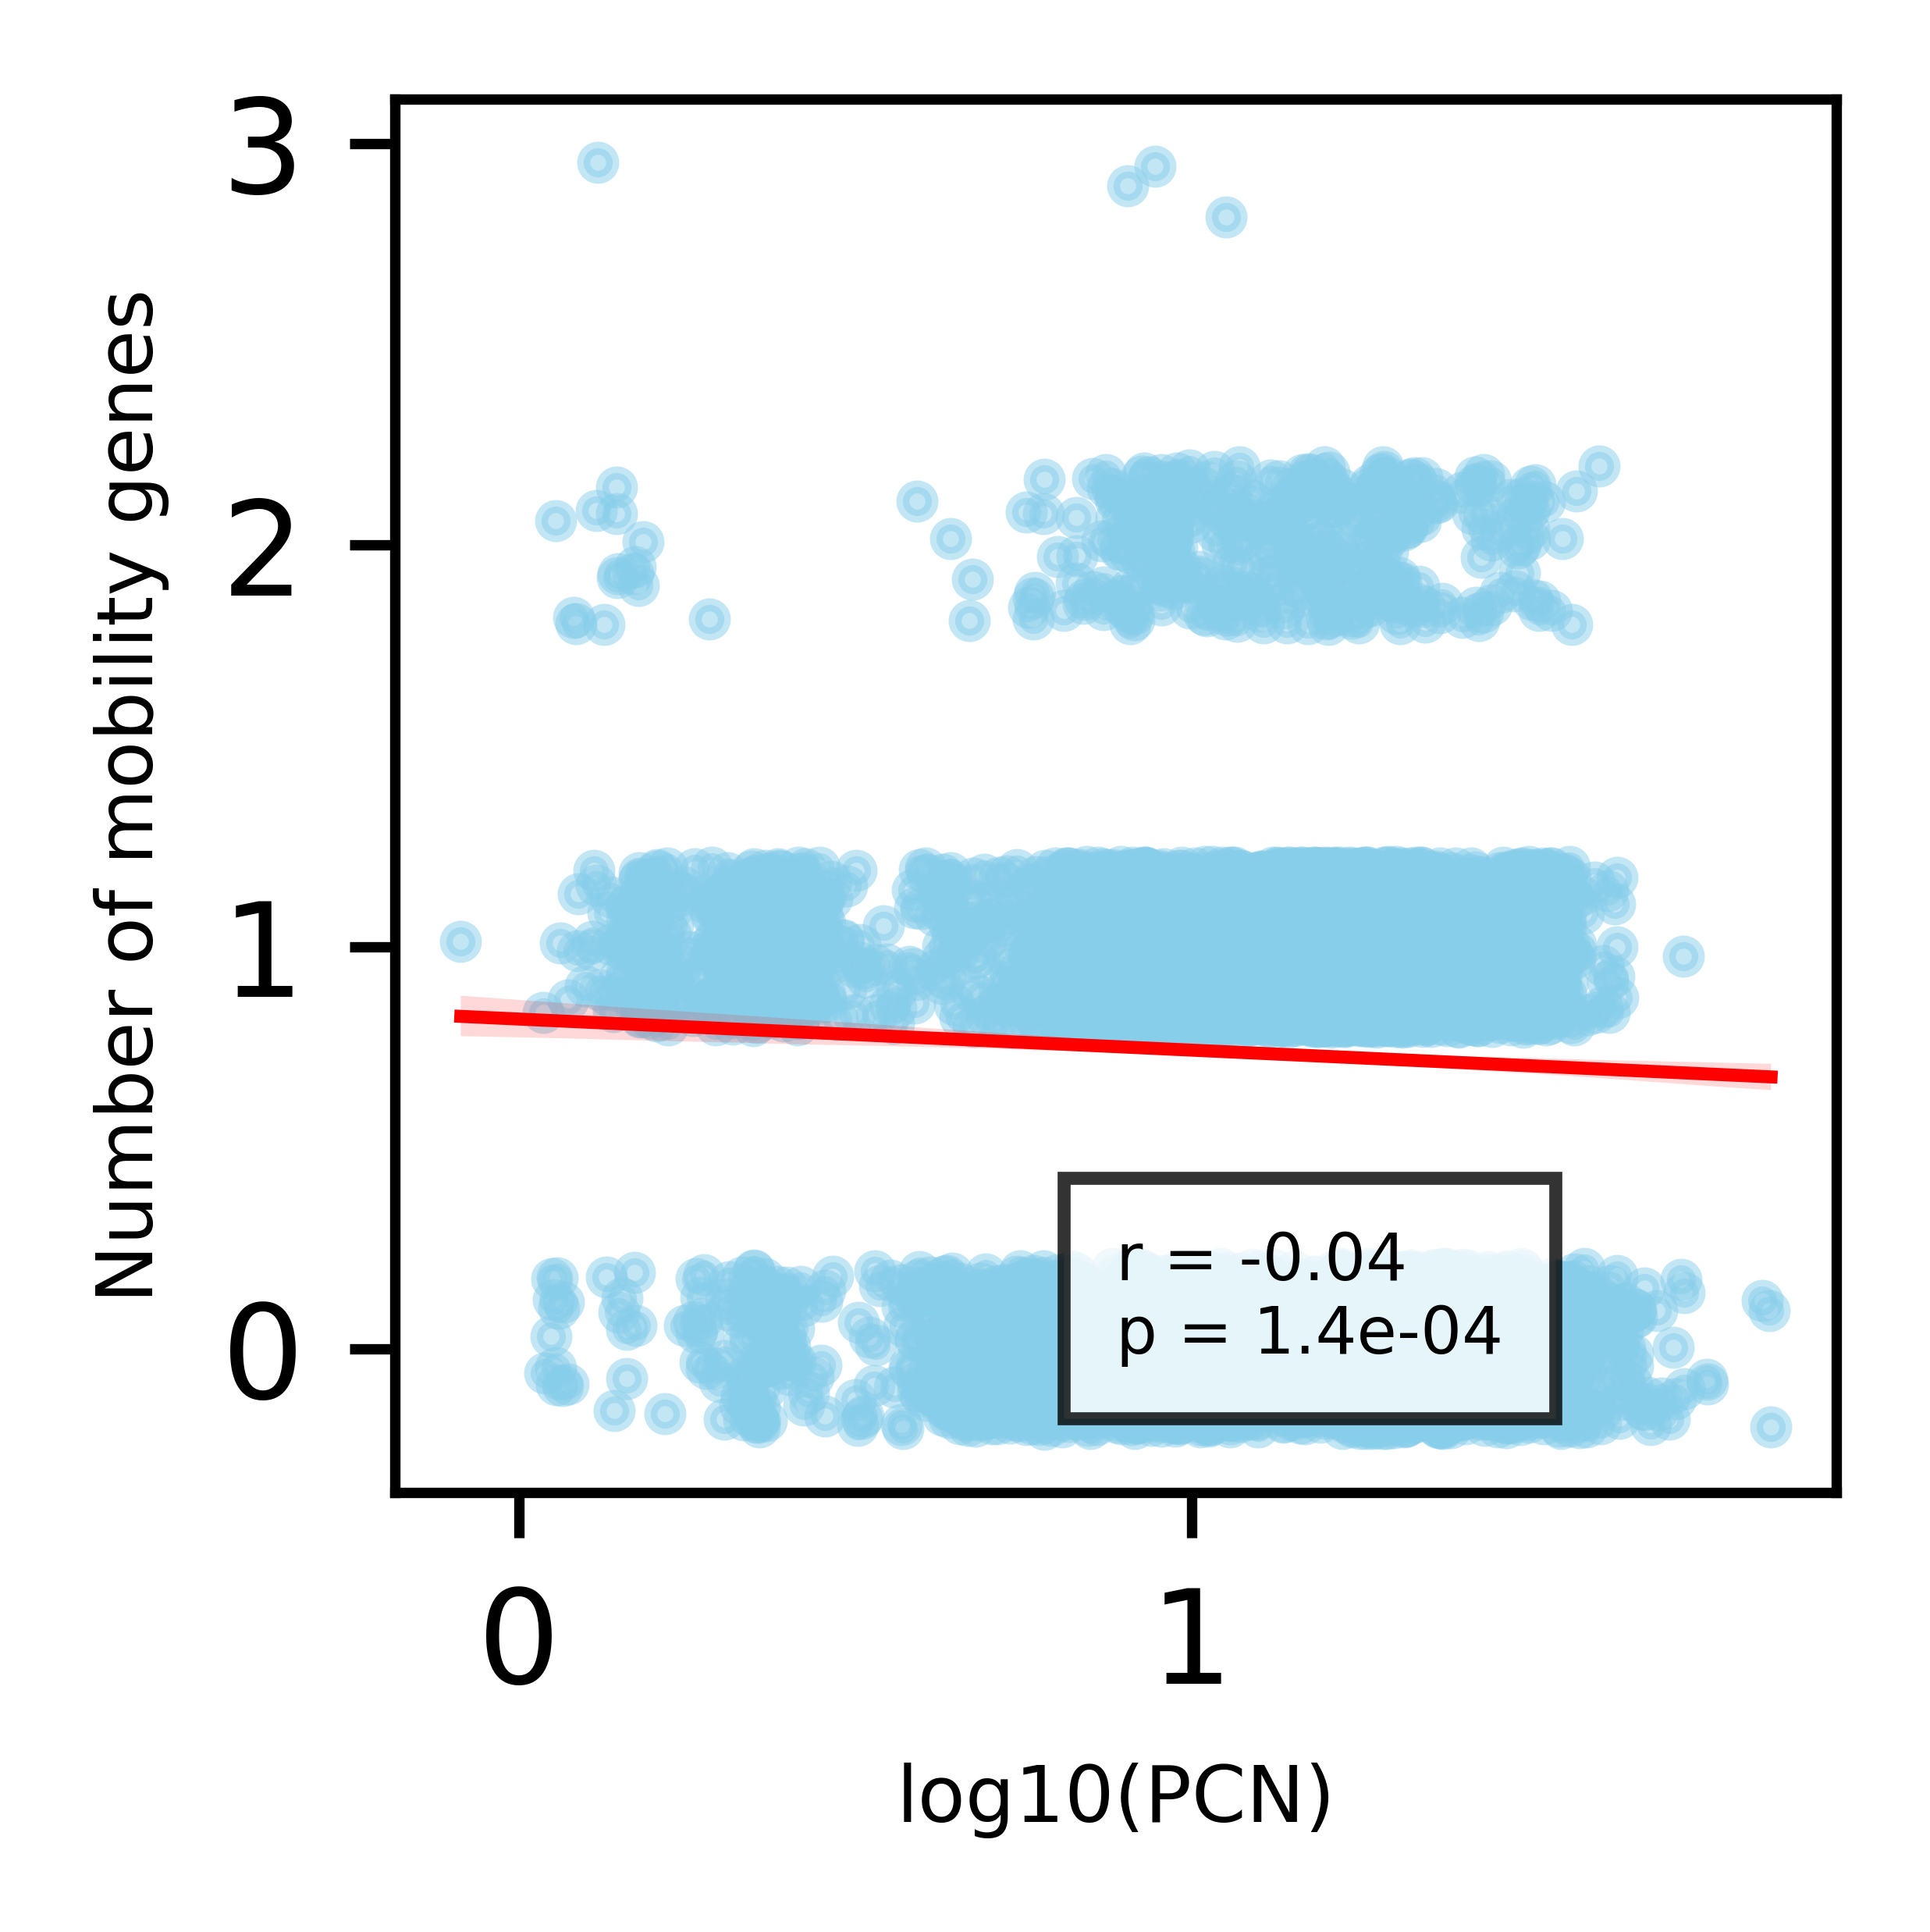

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
import os

# Load and clean dataset
file_name = 'Figure_5H_data.csv'
df = pd.read_csv(file_name)

# Display the first few rows to check the data
print(df.head())

# Filter only for human gut plasmids based on ecosystem
gut_keywords = [
    'Host-associated;Mammals: Human;Digestive system;Large intestine;Fecal',
    'Host-associated;Mammals: Human;Digestive system;Large intestine;Colon mucosa'
]
df = df[df['ecosystem'].isin(gut_keywords)]

# Compute log10(PCN)
df['log10_PCN'] = np.log10(df['PCN'])

# Create Mobility Gene Group Labels
def mob_gene_group(n):
    if n == 0:
        return 'Mob Genes = 0'
    elif n == 1:
        return 'Mob Genes = 1'
    elif n in [2, 3]:
        return 'Mob Genes = 2–3'
    else:
        return None

df['Mob_Gene_Group'] = df['Total_mob_genes'].apply(mob_gene_group)
df = df[df['Mob_Gene_Group'].notnull()]

# Pearson correlation
rho, pval_pearson = pearsonr(df['Total_mob_genes'], df['log10_PCN'])

# Set custom color palette
palette = {
    'Mob Genes = 0': '#1f77b4',
    'Mob Genes = 1': '#ff7f0e',
    'Mob Genes = 2–3': '#2ca02c'
}

# Create the regression plot only
fig, ax = plt.subplots(figsize=(2, 2), dpi=1200)

# RIGHT: Correlation Plot (Regression)
sns.regplot(
    y='Total_mob_genes',
    x='log10_PCN',
    data=df,
    y_jitter=0.2,
    scatter_kws={'alpha': 0.5, 's': 5, 'color': 'skyblue'},
    line_kws={'color': 'red', 'linewidth': 1},
    ax=ax
)
ax.set_xlabel('log10(PCN)', fontsize=6)
ax.set_ylabel('Number of mobility genes', fontsize=6)

# Add correlation text
ax.text(
    0.5, 0.1,
    f'r = {rho:.2f}\np = {pval_pearson:.1e}',
    transform=ax.transAxes,
    fontsize=5,
    bbox=dict(facecolor='white', alpha=0.8)
)

# Final layout and save
plt.tight_layout(pad=0.5)
plt.savefig('S6_D.pdf', bbox_inches='tight')
plt.show()


Selected toxin and antitoxin columns: ['Antitoxin CcdA', 'Antitoxin DinJ', 'Antitoxin HigA1', 'Antitoxin LsoB', 'Antitoxin MazE', 'Antitoxin VapB', 'Antitoxin VapB2', 'Antitoxin YefM', 'Antitoxin YobK', 'Antitoxin YokJ', 'Antitoxin epsilon', 'Endoribonuclease toxin MazF', 'Putative toxin HigB2', 'Toxin CcdB', 'Toxin HigB-1', 'Toxin HigB-2', 'Toxin PezT', 'Toxin RTX-I translocation ATP-binding protein', 'Toxin RelG', 'Toxin RelK', 'Toxin YoeB', 'Toxin zeta', 'mRNA interferase toxin RelE', 'mRNA interferase toxin YafQ']
Pearson correlation between number of toxins and log10(PCN): 0.21 (p-value: 0.0000)


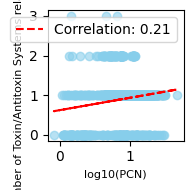

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import matplotlib.ticker as mticker

# Load the cleaned dataset
file_path = 'Figure_5G_data.csv'

# Load the CSV file and clean column names
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
# Select toxin and antitoxin columns
toxin_columns = [col for col in df.columns if 'toxin' in col.lower() or 'antitoxin' in col.lower()]
print("Selected toxin and antitoxin columns:", toxin_columns)

# Check if toxin columns are selected properly
if not toxin_columns:
    print("Warning: No toxin or antitoxin columns found.")
else:
    # Calculate the number of toxins carried by each plasmid
    df['Num_Toxins'] = df[toxin_columns].sum(axis=1)

    # Check for constant data in 'Num_Toxins' or 'log10_PCN'
    if df['Num_Toxins'].nunique() == 1 or df['PCN'].nunique() == 1:
        print("Warning: One of the columns is constant, correlation cannot be computed.")
    else:
        # Take log10 of PCN values (adding small constant to avoid log(0))
        df['log10_PCN'] = np.log10(df['PCN'])  # Added small constant to handle zeros

        # Compute correlation between 'Num_Toxins' and 'log10_PCN'
        correlation, p_value = pearsonr(df['Num_Toxins'], df['log10_PCN'])
        print(f"Pearson correlation between number of toxins and log10(PCN): {correlation:.2f} (p-value: {p_value:.4f})")

        # Create scatter plot with raw data points
        plt.figure(figsize=(2, 2))  # Increased size for better readability
        plt.scatter(df['log10_PCN'], df['Num_Toxins'], alpha=0.6, color='skyblue')

        # Add correlation line if significant
        if p_value < 0.05:
            m, b = np.polyfit(df['log10_PCN'], df['Num_Toxins'], 1)
            plt.plot(df['log10_PCN'], m*df['log10_PCN'] + b, color='red', linestyle='--', 
                     label=f'Correlation: {correlation:.2f}')

        plt.xlabel('log10(PCN)', fontsize=8)
        plt.ylabel('Number of Toxin/Antitoxin Systems related genes', fontsize=8)

        # Set y-axis to show integer ticks
        plt.gca().yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

        # Add correlation annotation if significant
        if p_value < 0.05:
            plt.legend()
        else:
            plt.text(0.05, 0.95, f'Correlation: {correlation:.2f} (not significant)', 
                     transform=plt.gca().transAxes, ha='left')

        plt.tight_layout()

        # Save plot
        plot_path = 'S6_C.pdf'
        plt.savefig(plot_path, dpi=300, bbox_inches='tight')
        plt.show()

